In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape 

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    
    error_term = np.subtract(y,np.dot(tx,w))
    loss = np.dot(error_term.T,error_term)
    loss = loss/(2 * tx.shape[0])
    return loss[0][0]

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    y = y.reshape((-1,1))
    
    for i in range(0,len(w0)):
        for j in range(0,len(w1)):
            
            w = np.asarray([w0[i],w1[j]])
            w = w.reshape((-1,1))        
            loss = compute_loss(y,tx,w)
            losses[i][j] = loss
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.7935410195, w0*=71.4285714286, w1*=15.306122449, execution time=0.253 seconds


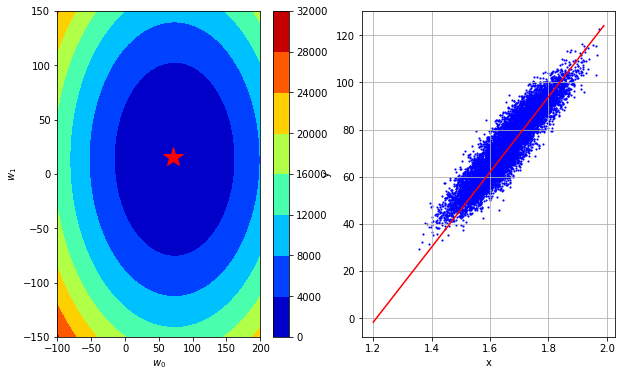

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)


# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    
    error_term = np.subtract(y,np.dot(tx,w))
    grad = np.dot(tx.T,error_term)
    grad = grad/tx.shape[0]
    grad = grad * -1 
    return grad

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w.copy().reshape(-1,1)]
    losses = []
    w = initial_w
    
    y = y.reshape((-1,1))
    w = w.reshape((-1,1))
    
    
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])


# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.23671276, w0=[51.3057454], w1=[9.4357987]
Gradient Descent(1/49): loss=265.302462109, w0=[66.69746902], w1=[12.26653832]
Gradient Descent(2/49): loss=37.8783795504, w0=[71.31498611], w1=[13.1157602]
Gradient Descent(3/49): loss=17.4102121202, w0=[72.70024123], w1=[13.37052676]
Gradient Descent(4/49): loss=15.5680770515, w0=[73.11581777], w1=[13.44695673]
Gradient Descent(5/49): loss=15.4022848953, w0=[73.24049073], w1=[13.46988572]
Gradient Descent(6/49): loss=15.3873636012, w0=[73.27789262], w1=[13.47676442]
Gradient Descent(7/49): loss=15.3860206847, w0=[73.28911319], w1=[13.47882803]
Gradient Descent(8/49): loss=15.3858998223, w0=[73.29247936], w1=[13.47944711]
Gradient Descent(9/49): loss=15.3858889446, w0=[73.29348921], w1=[13.47963284]
Gradient Descent(10/49): loss=15.3858879657, w0=[73.29379216], w1=[13.47968856]
Gradient Descent(11/49): loss=15.3858878775, w0=[73.29388305], w1=[13.47970527]
Gradient Descent(12/49): loss=15.3858878696, w0=[73.29

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J25faXRlcicsIG1heD01MSwgbWluPTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [45]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    
    error_term = y - np.dot(tx.T,w)
    grad = -1 * (np.dot(tx,error_term))
    return grad
    


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    y = y.reshape((-1,1))
    
    ws = [initial_w.copy().reshape(-1,1)]
    losses = []
    w = initial_w
    
    y = y.reshape((-1,1))
    w = w.reshape((-1,1))
    
    
    for n_iter in range(max_iters):
        
        cols = range(0,tx.shape[0])
        np.random.shuffle(cols)
        for i in cols:
            
            sampled_point  = tx[i,:].reshape((-1,1))
            sampled_target = y[i,:].reshape((-1,1))
            stoch_grad = compute_stoch_gradient(sampled_target,sampled_point,w)
            loss = compute_loss(sampled_target,sampled_point.T,w)
            w = w - gamma * stoch_grad 
            ws.append(w)
            losses.append(loss)
    
    
    return losses, ws

In [46]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=3.724 seconds


In [47]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J25faXRlcicsIG1heD01MSwgbWluPTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWTigKY=


<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [57]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Grid Search: loss*=16.4163806013, w0*=71.4285714286, w1*=15.306122449, execution time=0.018 seconds


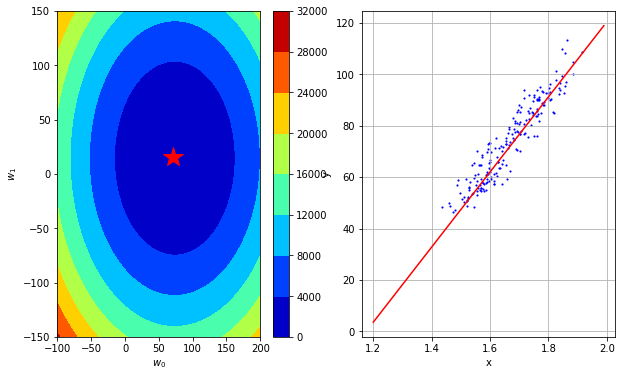

In [58]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)


# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [59]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Grid Search: loss*=71.1270196108, w0*=71.4285714286, w1*=9.18367346939, execution time=0.016 seconds


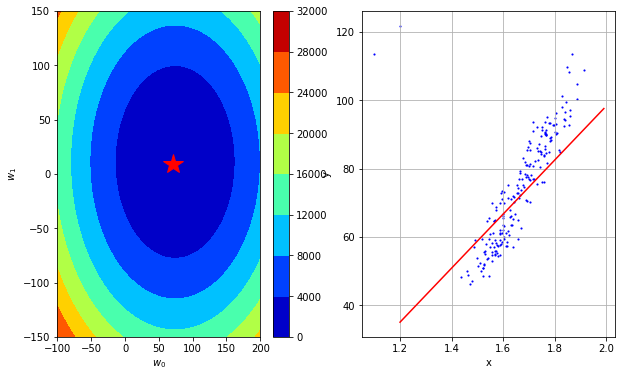

In [60]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)


# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving